# 1. Introduction

I love soccer and my favorite team Real Madrid has the won UEFA Champions League for the 14th time in its history. In comemoration of their latest achievement and the road it takes to accomplish what many European Soccer Teams set out to do, lets do some exploratory work of the 2021-2022 EUFA Champions League Season.

# 2. Import Observations and Initial Configuration

In [1]:
#Import Libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

import squarify
from sklearn import manifold


## Reading Data

### Read and import datasets regarding key stats

* attacking.csv : All attacking data.
* attempts.csv : All attacking atttempts data.
* defending.csv : All defensive and tackle data.
* disciplinary.csv : All fouls and bookings data.
* distributon.csv : All distribution and passing data.
* goalkeeping.csv : All GK (saves, conceded goals, punches) data.
* goals.csv : All goals data.
* key_stats.csv : Overall stats of all players. <br>

**All files contain stats by player name and clubs names**

In [2]:
#Import data

attacking = pd.read_csv("../input/ucl-202122-uefa-champions-league/attacking.csv")
attempts = pd.read_csv("../input/ucl-202122-uefa-champions-league/attempts.csv")
defending = pd.read_csv("../input/ucl-202122-uefa-champions-league/defending.csv")
disciplinary = pd.read_csv("../input/ucl-202122-uefa-champions-league/disciplinary.csv")
distribution = pd.read_csv("../input/ucl-202122-uefa-champions-league/distributon.csv")
goalkeeping = pd.read_csv("../input/ucl-202122-uefa-champions-league/goalkeeping.csv")
goals = pd.read_csv("../input/ucl-202122-uefa-champions-league/goals.csv")
key_stats = pd.read_csv("../input/ucl-202122-uefa-champions-league/key_stats.csv")

# 3. Insights and Analysis




### Key Stats

Quick glimpse of the data shows the key stats are compromised of player, club, position, minutes played, matches played, goals, assits and distance covered

In [3]:
key_stats.head(10) # View first 10 rows

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4
5,Alaba,Real Madrid,Defender,1040,12,1,0,112.3
6,Carvajal,Real Madrid,Defender,959,11,0,1,112.8
7,Casemiro,Real Madrid,Midfielder,914,11,0,0,107.6
8,Kroos,Real Madrid,Midfielder,902,12,2,0,116.5
9,Mendy,Real Madrid,Defender,867,10,0,2,96.3


In [4]:
key_stats.tail() # View last 5 rows

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2
746,Zesiger,Young Boys,Defender,1,1,0,0,-


Conitnuing the exploration and gathering insightful information to better understand the data

* describe
* shape
* columns
* unique values


Data consists of 747 unique players with an average play time of 331 minutes along and an average number of played matches of 5 games. The average number of goals amongst all players is .49 along with an average of .37 assisted goals 

In [5]:
key_stats.describe().T # Statistical Info.

,count,mean,std,min,25%,50%,75%,max
minutes_played,747.0,331.611780,248.371930,1.0,116.0,301.0,492.0,1230.0
match_played,747.0,5.089692,2.721425,1.0,3.0,5.0,7.0,13.0
goals,747.0,0.492637,1.313321,0.0,0.0,0.0,0.0,15.0
assists,747.0,0.376171,0.845502,0.0,0.0,0.0,0.0,7.0


Among the data the most common name is Martínez, and the most common position is the Midfielder position. The most frequent distance covered was 3.6.

In [6]:
key_stats.describe(include=['object']).T

,count,unique,top,freq
player_name,747,731,Martínez,3
club,747,32,Man. United,31
position,747,4,Midfielder,287
distance_covered,747,514,3.6,5


The data's dimensions are made up of 747 rows & 8 columns

In [7]:
key_stats.shape # (rows, columns)

(747, 8)

The columns' exact names are player_name, club, position, minutes_played, match_played, goals, assists, distance_covered

In [8]:
key_stats.columns # Names of df columns

Index(['player_name', 'club', 'position', 'minutes_played', 'match_played',
       'goals', 'assists', 'distance_covered'],
      dtype='object')

The number of unique values tells us that 32 teams make up the data, 731 out of the 747 players have unique names with the difference explained by players having the same name and there are a total of 4 unique player positions.

In [9]:
key_stats.nunique() # Number of unique values with columns

player_name         731
club                 32
position              4
minutes_played      424
match_played         13
goals                12
assists               8
distance_covered    514
dtype: int64

**Clubs that made the EUFA CL 2021-22 Tournament**


In [10]:
key_stats['club'].unique() # Names of clubs among key stats




array(['Real Madrid', 'Liverpool', 'Villarreal', 'Man. City', 'Benfica',
       'Atlético', 'Bayern', 'Chelsea', 'LOSC', 'Inter', 'Salzburg',
       'Ajax', 'Paris', 'Sporting CP', 'Juventus', 'Man. United',
       'Club Brugge', 'Sheriff', 'Wolfsburg', 'Dynamo Kyiv', 'Sevilla',
       'Shakhtar Donetsk', 'Zenit', 'Dortmund', 'Atalanta', 'Porto',
       'Barcelona', 'Young Boys', 'Leipzig', 'Malmö', 'Milan', 'Beşiktaş'],
      dtype=object)

**Player positions**

In [11]:
key_stats['position'].unique() # Player positions among key stats


array(['Goalkeeper', 'Forward', 'Midfielder', 'Defender'], dtype=object)

Locate missing values if any and remove column if more than 5% of data is null or missing 


In [12]:
# Locate any missing values if any
for col in key_stats.columns:  
    pct_missing = np.mean(key_stats[col].isnull())
    print('{} : {}%'.format(col, pct_missing))

player_name : 0.0%
club : 0.0%
position : 0.0%
minutes_played : 0.0%
match_played : 0.0%
goals : 0.0%
assists : 0.0%
distance_covered : 0.0%


# 4. Insights & Visulization of Key Stats
* Total goals scored per club
* Matches played per club
* Top goal scorers
* Average playing time per player



[Text(0.5, 0, 'Club'), Text(0, 0.5, 'Goals')]

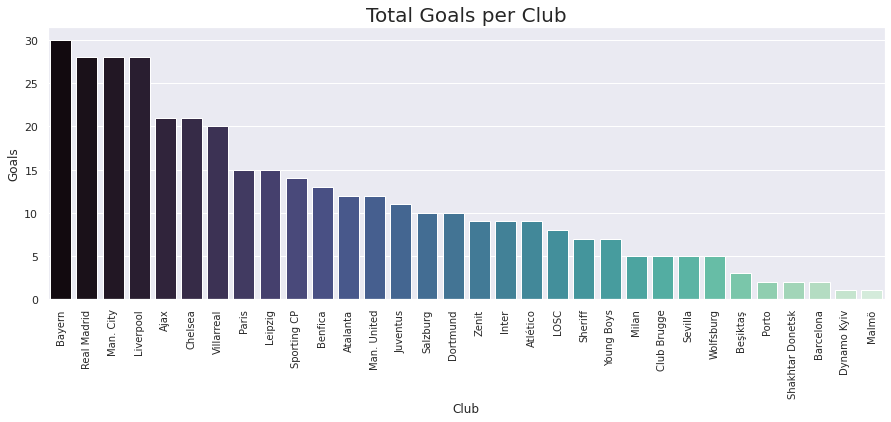

In [13]:
ksplt = key_stats.groupby('club',as_index = False)['goals'].sum().sort_values(by='goals', ascending=False) # Organize data frame
sns.set(rc = {'figure.figsize':(15,5)}) # Adjust plot size
plt.xticks(fontsize=10, rotation='vertical') # Format axis ticks
a = sns.barplot(x='club', y='goals', data=ksplt, palette='mako') # Customize and set axis parameters
a.axes.set_title('Total Goals per Club', fontsize='20') # Set title
a.set(xlabel='Club', ylabel='Goals') # Label x and y axis


**Insight:**
* Bayern had the most amount of goals amongst its players
* Real Madrid who won the tournament came in second 
* Man. City who finished as a semi-finalist came in third


In [14]:
mtchplt = key_stats.groupby('club',as_index = False)['match_played'].max().sort_values(by='match_played', ascending=False) # Organize data frame

fig = px.treemap(mtchplt, path=['club'],values= 'match_played', color='match_played', color_continuous_scale= 'deep', width=1000, height=500) # Build Treemap

fig.update_layout(title_text='Matches Played per Club', title_x=0.5) # Align title to center 
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25)) # Adjust margins
fig.show() # Show Treemap

**Insight:**
* Real Madrid and Liverpool aggregated the most amount of matches played in the tournament (final match played amongst them)
* Villarreal and Man. City came away witht second most amount of matches played due to the fact they played a 3rd/4rd place match
* LOSC, Atletico, Bayern and Benefica had the third most matches having partaken in the quarter-final matches
* Chelsea, Ajax, Salzburg, Man. United, Paris, Inter, Sporting CP and Juventus followed as the most matches played having partaken in the round of 16
* The remaining teams partook of the standard group stage matches unfortunately not qualifying to the knockout stages of competition

[Text(0.5, 0, 'Player'), Text(0, 0.5, 'Goals')]

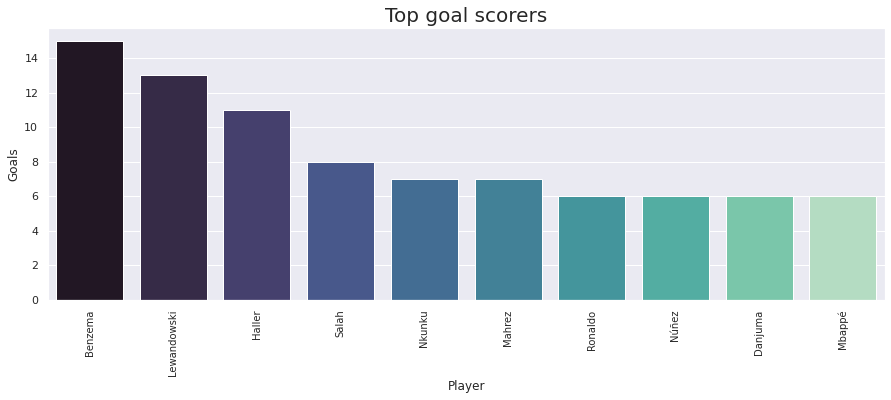

In [15]:
tgsplt = key_stats.groupby('player_name',as_index = False)['goals'].sum().sort_values(by='goals', ascending=False)[:10] # Organize data frame set limit to 10 players
sns.set(rc = {'figure.figsize':(15,5)}) # Adjust plot size
plt.xticks(fontsize=10, rotation='vertical') # Format axis ticks
a = sns.barplot(x='player_name', y='goals', data=tgsplt, palette='mako') # Customize and set axis parameters
a.axes.set_title('Top goal scorers', fontsize='20') # Set title
a.set(xlabel='Player', ylabel='Goals') # Label x and y axis

**Insight:**
* Benzema was the top scorer of the entire competition having scored 15 goals in 13 matches. **1.15 goals per game**
* Lewandowski was the runner up scorer with 13 goals despite only having participated in 10 matches. **1.3 goals per game**
* Haller in third, netted 11 goals in 8 mathces. **1.37 goals per game**
* Salah came in fourth despite having played 13 matches netting in 8 goals. **.61 goals per game**

Average Playing Time per Player

[Text(0.5, 0, 'Player'), Text(0, 0.5, 'Playing Time')]

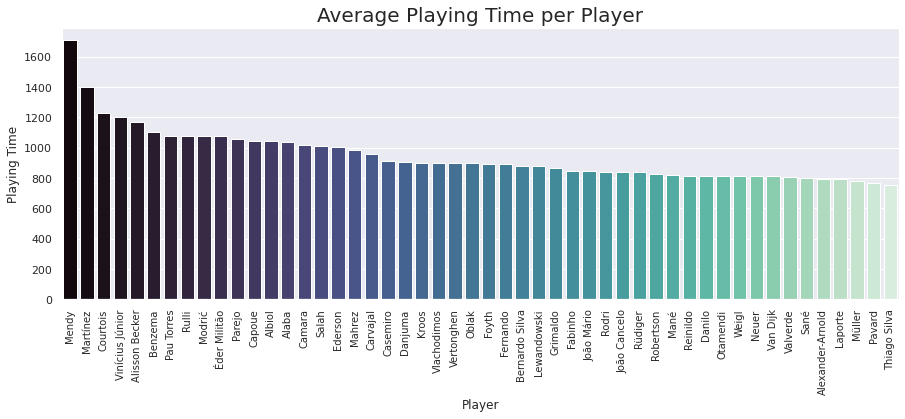

In [16]:
playtime = key_stats.groupby('player_name',as_index = False)['minutes_played'].sum().sort_values(by='minutes_played', ascending=False)[:50] # Organize data frame set limit to 10 players

sns.set(rc = {'figure.figsize':(15,5)}) # Adjust plot size
plt.xticks(fontsize=10, rotation='vertical') # Format axis ticks
a = sns.barplot(x='player_name', y='minutes_played', data=playtime, palette='mako') # Customize and set axis parameters
a.axes.set_title('Average Playing Time per Player', fontsize='20') # Set title
a.set(xlabel='Player', ylabel='Playing Time') # Label x and y axis


**Insight:** 
* Amongst the top 50 players with the most playing time, the average amount of playing time is between 800 and 1000 minutes played through out the tournament.
* Mendy played the most amount of time among all players in the tournament by a substantial amount.
* Players that made the top 50 players with the most playing time, are memebers of clubs that made it pass the qualifying group stage thus, contributing to longer playing times.


In [17]:
print(key_stats)

         player_name         club    position  minutes_played  match_played  \
0           Courtois  Real Madrid  Goalkeeper            1230            13   
1    Vinícius Júnior  Real Madrid     Forward            1199            13   
2            Benzema  Real Madrid     Forward            1106            12   
3             Modrić  Real Madrid  Midfielder            1077            13   
4       Éder Militão  Real Madrid    Defender            1076            12   
..               ...          ...         ...             ...           ...   
742         Gil Dias      Benfica  Midfielder               1             1   
743  Rodrigo Ribeiro  Sporting CP     Forward               1             1   
744         Cojocari      Sheriff    Defender               1             1   
745         Maouassa  Club Brugge    Defender               1             1   
746          Zesiger   Young Boys    Defender               1             1   

     goals  assists distance_covered  
0        0  

**Check for missing values before analysis of data**
* If variable has more than %5 missing data then remove variable 

In [18]:
# Find any missing values or missing data

for col in attacking.columns:
    pct_missing = np.mean(attacking[col].isnull())
    print('{} : {}%'.format(col, pct_missing))

serial : 0.0%
player_name : 0.0%
club : 0.0%
position : 0.0%
assists : 0.0%
corner_taken : 0.0%
offsides : 0.0%
dribbles : 0.0%
match_played : 0.0%


In [19]:
# Find any missing values or missing data

for col in defending.columns:
    pct_missing = np.mean(defending[col].isnull())
    print('{} : {}%'.format(col, pct_missing))

serial : 0.0%
player_name : 0.0%
club : 0.0%
position : 0.0%
balls_recoverd : 0.0%
tackles : 0.0%
t_won : 0.0%
t_lost : 0.0%
clearance_attempted : 0.0%
match_played : 0.0%


In [20]:
for col in attempts.columns:
    pct_missing = np.mean(attempts[col].isnull())
    print('{} : {}%'.format(col, pct_missing))

serial : 0.0%
player_name : 0.0%
club : 0.0%
position : 0.0%
total_attempts : 0.0%
on_target : 0.0%
off_target : 0.0%
blocked : 0.0%
match_played : 0.0%


In [21]:
for col in disciplinary.columns:
    pct_missing = np.mean(disciplinary[col].isnull())
    print('{} : {}%'.format(col, pct_missing))

serial : 0.0%
player_name : 0.0%
club : 0.0%
position : 0.0%
fouls_committed : 0.0%
fouls_suffered : 0.0%
red : 0.0%
yellow : 0.0%
minutes_played : 0.0%
match_played : 0.0%


In [22]:
for col in distribution.columns:
    pct_missing = np.mean(distribution[col].isnull())
    print('{} : {}%'.format(col, pct_missing))

serial : 0.0%
player_name : 0.0%
club : 0.0%
position : 0.0%
pass_accuracy : 0.0%
pass_attempted : 0.0%
pass_completed : 0.0%
cross_accuracy : 0.0%
cross_attempted : 0.0%
cross_complted : 0.0%
freekicks_taken : 0.0%
match_played : 0.0%


In [23]:
for col in goalkeeping.columns:
    pct_missing = np.mean(goalkeeping[col].isnull())
    print('{} : {}%'.format(col, pct_missing))

serial : 0.0%
player_name : 0.0%
club : 0.0%
position : 0.0%
saved : 0.0%
conceded : 0.0%
saved_penalties : 0.0%
cleansheets : 0.0%
punches made : 0.0%
match_played : 0.0%


In [24]:
for col in goals.columns:
    pct_missing = np.mean(goals[col].isnull())
    print('{} : {}%'.format(col, pct_missing))

serial : 0.0%
player_name : 0.0%
club : 0.0%
position : 0.0%
goals : 0.0%
right_foot : 0.0%
left_foot : 0.0%
headers : 0.0%
others : 0.0%
inside_area : 0.0%
outside_areas : 0.0%
penalties : 0.0%
match_played : 0.0%


In [25]:
for col in key_stats.columns:
    pct_missing = np.mean(key_stats[col].isnull())
    print('{} : {}%'.format(col, pct_missing))

player_name : 0.0%
club : 0.0%
position : 0.0%
minutes_played : 0.0%
match_played : 0.0%
goals : 0.0%
assists : 0.0%
distance_covered : 0.0%
